Câu 1:

In [ ]:
import pandas as pd
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import warnings
warnings.filterwarnings('ignore')

# 1. Đọc và xử lý dữ liệu
with open('groceries.csv', 'r') as f:
    # Tách các item trong mỗi dòng bằng dấu phẩy
    dataset = [line.strip().split(',') for line in f.readlines()]

# 2. Chuyển đổi dữ liệu về dạng One-Hot Encoding
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Kích thước dữ liệu sau khi One-Hot: {df.shape}")


supports = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.08, 0.1]
apriori_times = []
print("Lý Thanh Nguyên - 6351071050\n")
print("\n--- KẾT QUẢ THUẬT TOÁN APRIORI ---")
print("Support\t\tThời gian (s)\tSố lượng tập phổ biến")

for s in supports:
    start_time = time.time()
    # Chạy Apriori
    frequent_itemsets = apriori(df, min_support=s, use_colnames=True)
    end_time = time.time()

    exec_time = end_time - start_time
    apriori_times.append(exec_time)

    print(f"{s:.3f}\t\t{exec_time:.4f}\t\t{len(frequent_itemsets)}")

Kích thước dữ liệu sau khi One-Hot: (9835, 169)
Lý Thanh Nguyên - 6351071050


--- KẾT QUẢ THUẬT TOÁN APRIORI ---
Support		Thời gian (s)	Số lượng tập phổ biến
0.010		0.5485		333
0.020		0.1483		122
0.030		0.0753		63
0.040		0.0432		41
0.050		0.0319		31
0.060		0.0184		21
0.080		0.0102		13
0.100		0.0067		8


Câu 2:

In [ ]:
from mlxtend.frequent_patterns import fpgrowth

fpgrowth_times = []
print("Lý Thanh Nguyên - 6351071050\n")
print("\n--- KẾT QUẢ THUẬT TOÁN FP-GROWTH ---")
print("Support\t\tThời gian (s)\tSố lượng tập phổ biến")

for s in supports:
    start_time = time.time()
    # Chạy FP-Growth
    frequent_itemsets_fp = fpgrowth(df, min_support=s, use_colnames=True)
    end_time = time.time()

    exec_time = end_time - start_time
    fpgrowth_times.append(exec_time)

    print(f"{s:.3f}\t\t{exec_time:.4f}\t\t{len(frequent_itemsets_fp)}")

Lý Thanh Nguyên - 6351071050


--- KẾT QUẢ THUẬT TOÁN FP-GROWTH ---
Support		Thời gian (s)	Số lượng tập phổ biến
0.010		9.5137		333
0.020		2.0748		122
0.030		0.7003		63
0.040		0.3714		41
0.050		0.3218		31
0.060		0.1114		21
0.080		0.0707		13
0.100		0.0675		8


Câu 3:

Lý Thanh Nguyên - 6351071050



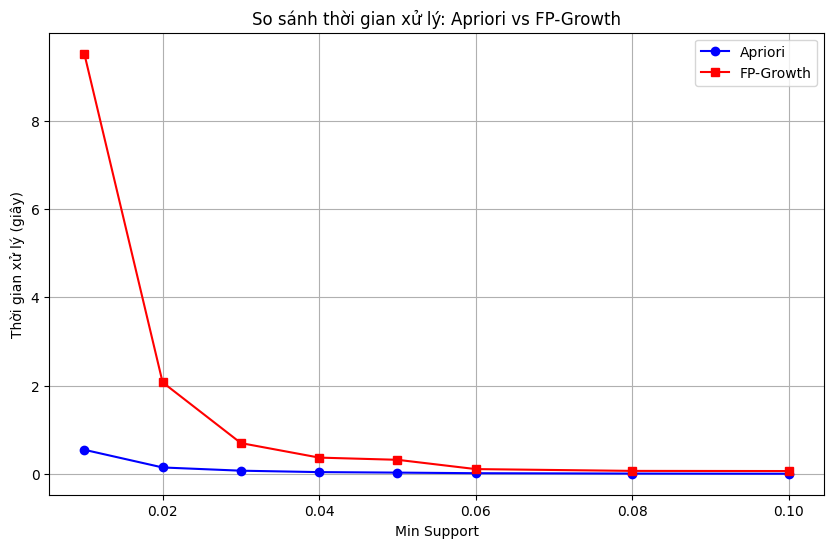

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(supports, apriori_times, marker='o', label='Apriori', color='blue')
plt.plot(supports, fpgrowth_times, marker='s', label='FP-Growth', color='red')
print("Lý Thanh Nguyên - 6351071050\n")
plt.title('So sánh thời gian xử lý: Apriori vs FP-Growth')
plt.xlabel('Min Support')
plt.ylabel('Thời gian xử lý (giây)')
plt.legend()
plt.grid(True)
plt.show()